In [24]:
import random
from random import sample, seed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.datasets import make_classification
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer 
from sklearn.decomposition import PCA

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=5, suppress=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values
labels = boston.feature_names

{'whiskers': [<matplotlib.lines.Line2D at 0x128744f50>,
 'caps': [<matplotlib.lines.Line2D at 0x12874ea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x128744950>],
 'medians': [<matplotlib.lines.Line2D at 0x128756510>],
 'fliers': [<matplotlib.lines.Line2D at 0x128756a50>],
 'means': []}

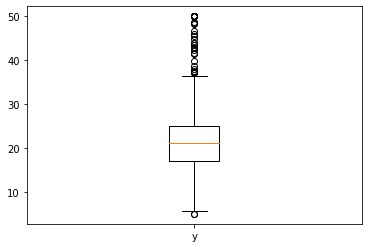

In [3]:
plt.boxplot(y, labels=('y'))

In [6]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression()

In [10]:
SSE = np.linalg.norm(y - linear_regression.predict(X)) ** 2
RMSE = np.sqrt(SSE / (X.shape[0] - X.shape[1] -1))
standardized_residuals = (y - linear_regression.predict(X)) / RMSE

Text(0, 0.5, 'standardized residuals')

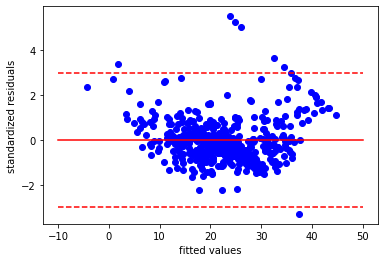

In [14]:
plt.plot(linear_regression.predict(X), standardized_residuals, 'bo')
plt.plot([-10, 50], [0, 0], "r-")
plt.plot([-10, 50], [3, 3], "r--")
plt.plot([-10, 50], [-3, -3], "r--")
plt.xlabel('fitted values')
plt.ylabel('standardized residuals')

### 예측변수의 이상치

In [17]:
standardization = StandardScaler(with_mean=True, with_std=True)
Xs = standardization.fit_transform(X)

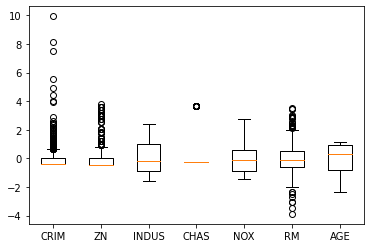

In [23]:
boxplot = plt.boxplot(Xs[:, 0:7], labels=labels[0:7])

In [25]:
pca = PCA()
pca.fit(Xs)
C = pca.transform(Xs)
pca.explained_variance_ratio_

array([0.4713 , 0.11025, 0.09559, 0.06597, 0.06422, 0.05057, 0.04118,
       0.03047, 0.0213 , 0.01694, 0.01431, 0.01302, 0.00489])

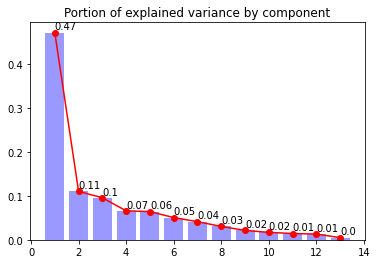

In [32]:
explained_variance = pca.explained_variance_ratio_
plt.title('Portion of explained variance by component')
range_ = [r + 1 for r in range(len(explained_variance))]
plt.bar(range_, explained_variance, color="b", alpha=0.4, align="center")
plt.plot(range_, explained_variance, 'ro-')
for pos, pct in enumerate(explained_variance):
    plt.annotate(str(round(pct, 2)), (pos + 1, pct + 0.007))

Text(0, 0.5, 'Dimension 2')

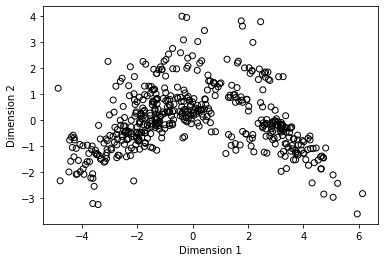

In [34]:
scatter = plt.scatter(C[:, 0], C[:, 1], facecolors='none', edgecolors='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 3')

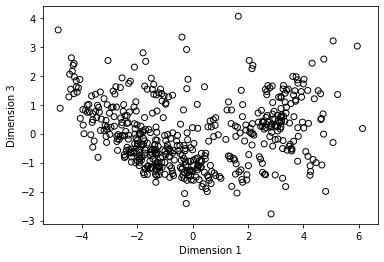

In [35]:
scatter = plt.scatter(C[:, 0], C[:, 2], facecolors='none', edgecolors='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 3')